In [1]:
%matplotlib inline

from __future__ import print_function
import math
import itertools
import numpy
import numpy.linalg
import matplotlib.pyplot as plt

In [2]:
U = 1.0
J = 0.01
mu = 0.5
print('J/U:  %f' % (J / U))
print('mu/U: %f' % (mu / U))

J/U:  0.010000
mu/U: 0.500000


In [3]:
L = 3
nmax = 2
nstates = (nmax + 1) ** L
H = numpy.zeros((nstates,nstates))
states = numpy.empty((nstates, L), dtype=int)
print('#sites:                   %i' % L)
print('nmax:                     %i' % nmax)
print('Hilbert-space dimensions: %i' % nstates)

#sites:                   3
nmax:                     2
Hilbert-space dimensions: 27


In [4]:
istate=0
for state in itertools.product(range(nmax + 1), repeat=L):
    states[istate, :] = state[:]
    istate += 1
print('States enumeration completed')

States enumeration completed


In [5]:
# Fill matrix H
for istate1, state1 in enumerate(states):
    # Diagonal terms
    for site in xrange(L):
        H[istate1, istate1] += 0.5 * U * state1[site] * (state1[site] - 1.0)
        H[istate1, istate1] -= mu * state1[site]

    # Off-diagonal terms
    for istate2, state2 in enumerate(states):
        H[istate1, istate2] = 0.0
        for site in xrange(L):
            
            state1_site = state1[site]
            state2_site = state2[site]
            state1_site_p1 = state1[(site + 1) % L]
            state2_site_p1 = state2[(site + 1) % L]
            
            if ((state1_site == (state2_site + 1)) and
                (state1_site_p1 == (state2_site_p1 - 1))):
                H[istate1, istate2] -= J * math.sqrt(state1_site * (state1_site_p1 + 1.0))
                assert istate1 != istate2
            if ((state1_site_p1 == (state2_site_p1 + 1)) and
                (state1_site == (state2_site - 1))):
                H[istate1, istate2] -= J * math.sqrt(state1_site_p1 * (state1_site + 1.0))

print('All entries of H filled.')
print('Is the matrix H symmetric?', numpy.allclose(H, H.T))

All entries of H filled.
Is the matrix H symmetric? True


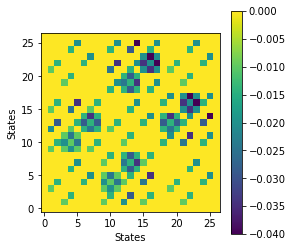

In [6]:
plt.matshow(H, origin='lower')
plt.gca().xaxis.tick_bottom()
plt.colorbar()
plt.xlabel('States')
plt.ylabel('States')

In [7]:
evals, evecs = numpy.linalg.eigh(H)
indices = evals.argsort()
evals = evals[indices]
evecs = (evecs.T)[indices]
for ind in xrange(5):
    print('%i-th eigenvalue: %+f' % (ind, evals[ind]))

0-th eigenvalue: -0.142047
1-th eigenvalue: -0.067535
2-th eigenvalue: -0.057010
3-th eigenvalue: -0.057010
4-th eigenvalue: -0.040140


In [8]:
def average_on_site_density(site, coefficients, states):
    dens = 0.0
    for istate, state in enumerate(states):
        dens += coefficients[istate] * state[site]
    return dens

for istate in xrange(8):
    ns = [average_on_site_density(site, evecs[istate], states) for site in xrange(L)]
    print('[%i-th state | E=%+f] <n_i>:' % (istate, evals[istate]), ns)


[0-th state | E=-0.142047] <n_i>: [5.1228800690575103, 5.1228800690575085, 5.1228800690575103]
[1-th state | E=-0.067535] <n_i>: [-0.61997454375210825, -0.61997454375210748, -0.61997454375210692]
[2-th state | E=-0.057010] <n_i>: [-0.42912649955657262, 0.39743356529596258, 0.031692934260609568]
[3-th state | E=-0.057010] <n_i>: [0.21116045178184462, 0.26605422416215985, -0.47721467594400591]
[4-th state | E=-0.040140] <n_i>: [-0.060469709218386736, -0.060469709218385098, -0.060469709218391579]
[5-th state | E=-0.033277] <n_i>: [0.30557377664010343, 0.78313592334497328, -1.0887096999850736]
[6-th state | E=-0.033277] <n_i>: [-1.0807105745110241, 0.80498994055619177, 0.27572063395483332]
[7-th state | E=-0.000000] <n_i>: [-0.48889487085527072, 1.0421641301128666, -0.53863021377550724]
